In [14]:
import pandas as pd
alldata = pd.read_csv('all_Data_newest_more_features_pisa.csv',encoding='gbk')
alldata['Lumbar Number'] = alldata['编号'].apply(lambda x: int(x[-1])+1) 
from pycaret.classification import *
import random
random.seed(798)
a=setup(alldata,'label',train_size=0.65, feature_interaction=True,feature_ratio=True,normalize=True,fix_imbalance=True,ignore_features=['编号'],session_id=0)

,Description,Value
0,session_id,0
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(839, 30)"
5,Missing Values,False
6,Numeric Features,27
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
rf = create_model('lightgbm')
rf = tune_model(rf, optimize='Accuracy',choose_better=True,round=3,n_iter = 150)
rf = tune_model(rf, optimize='F1',choose_better=True,round=3,n_iter = 50)
rf = tune_model(rf, optimize='Accuracy',choose_better=True,round=3,n_iter = 200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.964,0.969,0.923,0.923,0.923,0.899,0.899
1,0.927,0.958,0.923,0.800,0.857,0.809,0.812
2,0.891,0.949,0.769,0.769,0.769,0.698,0.698
3,0.945,0.965,0.846,0.917,0.880,0.845,0.846
4,0.945,0.984,0.846,0.917,0.880,0.845,0.846
5,0.926,0.952,0.750,0.900,0.818,0.772,0.777
6,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,0.981,0.990,1.000,0.923,0.960,0.948,0.949
8,0.963,0.987,0.923,0.923,0.923,0.899,0.899
9,0.963,0.989,0.923,0.923,0.923,0.899,0.899


In [58]:
res=predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9660,0.9832,0.9020,0.9020,0.9020,0.8814,0.8814


In [43]:
lgbm=load_model('lightgbm_ckpt')

Transformation Pipeline and Model Successfully Loaded


In [41]:
save_model(rf, 'lightgbm_ckpt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['编号'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.2,
                                 max_depth=-1, min_child_samples=21,
                                 min_child_weight=0

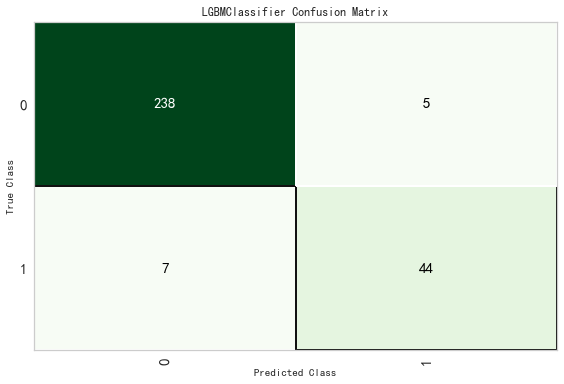

In [36]:
plot_model(rf, 'confusion_matrix')

In [61]:
model=lgbm
# 保存实验结果
X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
save_model(model, 'LGBMmodel')
save_config('config')

Transformation Pipeline and Model Successfully Saved
